In [1]:
%matplotlib inline
# load plotting tools
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
from mpl_toolkits import mplot3d
# load numpy
import numpy as np
# import scipy for pile plotting
import scipy.optimize
# load os and cli manipulators
import os
import subprocess

In [2]:
# get the number of generations by counting the number of files
genNo = len(os.listdir('./data'))
# get te number of individuals by counting the number of lines
indNo = sum(1 for line in open('./data/gen0.txt'))
# the shell command to get the number of variables+1 is
# 'head -1 ./data/gen0.txt | grep -o "," | wc -l'
# which is equivalent to the next python commands
sampleInd = subprocess.Popen(('head', '-1', './data/gen0.txt'), stdout=subprocess.PIPE)
elements = subprocess.check_output(('grep', '-o', ','), stdin=sampleInd.stdout)
varNo = str(elements).count(',')-1
# store all generations, individuals and variables + 2 objectives
gen = np.zeros((genNo,indNo,varNo+2))
# read the files
for i in range(genNo):
    gen[i,:] = np.genfromtxt('./data/gen%d.txt' %i, delimiter=',')

In [3]:
# define the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# 'close' the figure to avoid extra empty axis
plt.close()
# define init function
def init():
    ax1.clear()
    ax1.axis([2e3,4.5e3,1e4,1e6])
    ax1.tick_params(axis='both', labelsize=20)
    ax1.set_xlabel('Total heat transfer ($W$)', fontsize=20)
    ax1.set_ylabel('Air surface ($m^2$)', fontsize=20)
    ax1.set_title('Snow pile optimization', fontsize=24)
    ax2.clear()
    ax2.axis([2.05e3,2.6e3,2e4,7e4])
    ax2.tick_params(axis='both', labelsize=20)
    ax2.set_xlabel('Total heat transfer ($W$)', fontsize=20)
    ax2.set_ylabel('Air surface ($m^2$)', fontsize=20)
    ax2.set_title('Snow pile optimization - Pareto Front detail', fontsize=24)

# define function with generation as variable
def animate(iGen):
    for i in range(iGen):
        # this time just each 10 generations will be represented
        newgen, = ax1.plot(gen[10*i,:,-1],gen[10*i,:,-2], 
                          '.',markersize=i,alpha=1-i*0.5/genNo,
                          c=plt.cm.viridis((10*i+1)/genNo))
        newgen, = ax2.plot(gen[10*i,:,-1],gen[10*i,:,-2], 
                          '.',markersize=i,alpha=1-i*0.5/genNo,
                          c=plt.cm.viridis((10*i+1)/genNo))

# create the animation
ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, frames=26)
# call the animation
ani

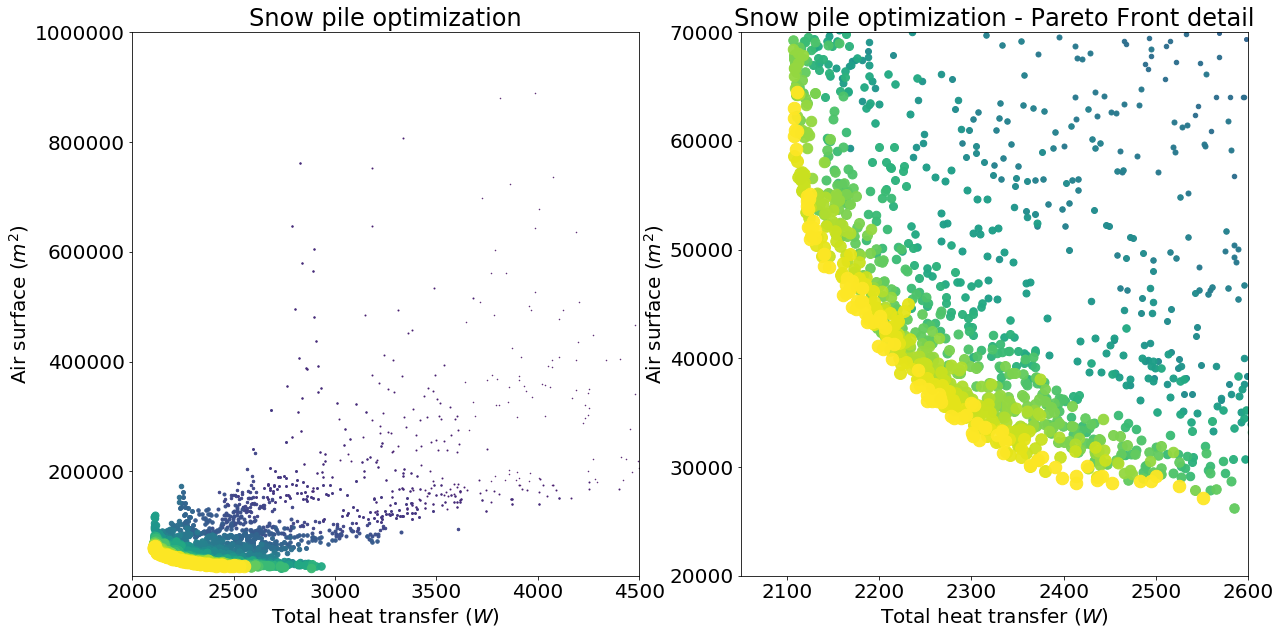

In [4]:
## static image for online visualization
# define the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.clear()
ax1.axis([2e3,4.5e3,1e4,1e6])
ax1.tick_params(axis='both', labelsize=20)
ax1.set_xlabel('Total heat transfer ($W$)', fontsize=20)
ax1.set_ylabel('Air surface ($m^2$)', fontsize=20)
ax1.set_title('Snow pile optimization', fontsize=24)
ax2.clear()
ax2.axis([2.05e3,2.6e3,2e4,7e4])
ax2.tick_params(axis='both', labelsize=20)
ax2.set_xlabel('Total heat transfer ($W$)', fontsize=20)
ax2.set_ylabel('Air surface ($m^2$)', fontsize=20)
ax2.set_title('Snow pile optimization - Pareto Front detail', fontsize=24)
for i in range(int(genNo/10)+1):
    ax1.plot(gen[10*i,:,-1],gen[10*i,:,-2], '.',markersize=i,alpha=1-i*0.5/genNo, 
             c=plt.cm.viridis((10*i+1)/genNo))
    ax2.plot(gen[10*i,:,-1],gen[10*i,:,-2], '.',markersize=i,alpha=1-i*0.5/genNo,
             c=plt.cm.viridis((10*i+1)/genNo))